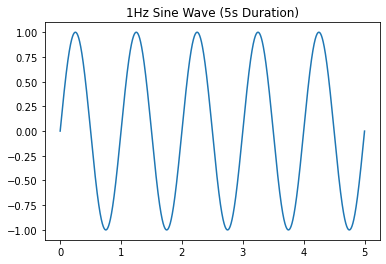

In [68]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 1 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(1, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.title('1Hz Sine Wave (5s Duration)')
plt.savefig("image_1_2hz.jpg", dpi=1200)
plt.show()

In [69]:
# Mixing 2Hz and 5Hz Sine Waves  
_x, nice_tone = generate_sine_wave(1, SAMPLE_RATE, DURATION)
_x2, noise_tone = generate_sine_wave(3, SAMPLE_RATE, DURATION)
# noise_tone = noise_tone * 0.3

mixed_tone = (nice_tone + noise_tone) / 2
_total = (_x + _x2) / 2

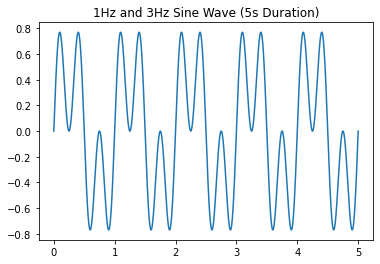

In [70]:
# normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(_total, mixed_tone)
plt.title('1Hz and 3Hz Sine Wave (5s Duration)')
plt.savefig("image_1_2hz.jpg", dpi=1200)
plt.show()

In [71]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

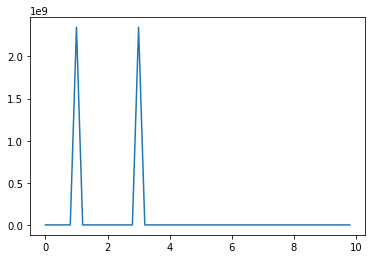

In [72]:
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

# Plot first 50 Frequencies. Notice spikes at 1 and 3.
plt.plot(xf[:50], np.abs(yf[:50]))
plt.show()

In [73]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)

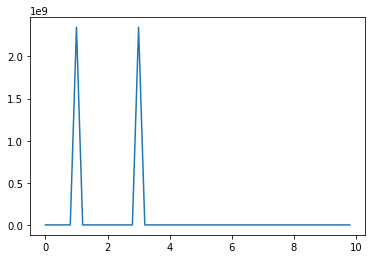

In [77]:
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf[:50], np.abs(yf[:50]))
plt.show()

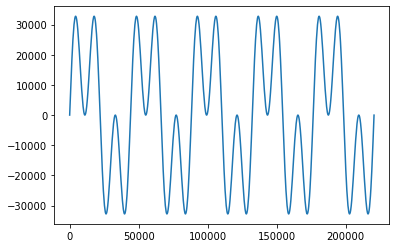

In [79]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig) # [:1000]
plt.show()

In [80]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)